In [5]:
%matplotlib inline

import sys
sys.path.insert(0, '../')

from pharynx_analysis import experiment, pharynx_io, image_processing

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mpl_col

import numpy as np
import xarray as xr
from fdasrsf import time_warping
import statsmodels.stats.api as sms

import pickle
from importlib import reload


ModuleNotFoundError: No module named 'optimum_reparamN'

# Load Data

In [4]:
# pe = pickle.load(open('/Users/sean/code/wormAnalysis/data/experiment.pickle', 'rb'))
# pe.raw_image_data.strain.size

reload(experiment)
reload(pharynx_io)
reload(image_processing)

img_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_movement_data_sean/2017_02_22-HD233_SAY47/2017_02_22-HD233_SAY47.tif"
strain_map_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_movement_data_sean/2017_02_22-HD233_SAY47/indexer.csv"

strains = pharynx_io.load_strain_map_from_disk(strain_map_path)
taxpe = experiment.PairExperiment(img_path, "TL/470_1/410_1/470_2/410_2", strains, midline_smoothing=1e8)
# pickle.dump(pe, open('/Users/sean/code/wormAnalysis/data/experiment.pickle', 'wb'))

AttributeError: 'DataArray' object has no attribute 'swapaxes'

# Plot individual ratios for each pair, colored by their avg

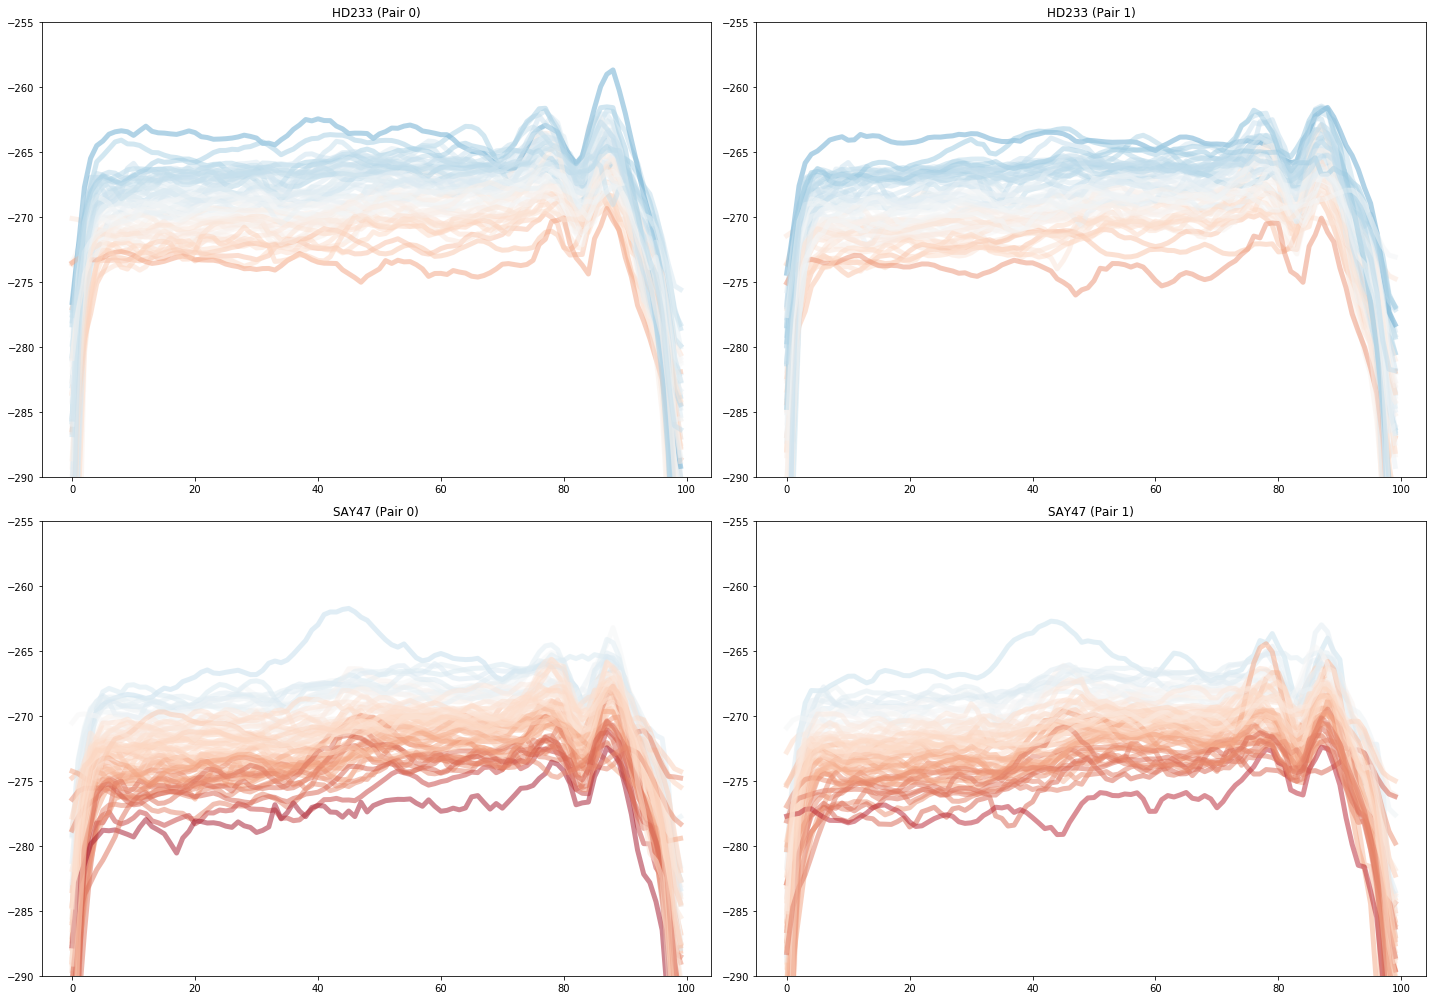

In [3]:
def plot_individual_profile_data_by_strain_and_pair(
    profile_data, cmin, cmax, cmap_name, linewidth=1, ylim=None, alpha=1, figsize=None, cmap_boundary_trim=0):

    cmap = cm.get_cmap(name='RdBu')
    norm = mpl_col.Normalize(vmin=cmin, vmax=cmax)

    strains = np.unique(profile_data.strain.data)

    if ylim is None:
        ylim = [pe.e.min(), pe.e.max()]

    n_strains = len(strains)
    fig, axes = plt.subplots(n_strains, 2, figsize=figsize)
    
    for strain, ax in zip(strains, axes):
        for i in range(2):
            data = profile_data.isel(pair=i).sel(strain=strain)
            color_data = data[:,cmap_boundary_trim:profile_data.position.size-cmap_boundary_trim]
            means_normed = norm(color_data.mean(dim='position').data)
            colors = cmap(means_normed)
            colors[:, 3] = alpha
            for animal_idx in range(data.shape[0]):
                ax[i].plot(data[animal_idx], c=colors[animal_idx], linewidth=linewidth)
                ax[i].set_ylim(ylim)
            ax[i].set_title(f'{strain} (Pair {i})')
            if cmap_boundary_trim > 0:
                boundary_line_args = {
                    'color': 'k', 'linewidth': 1, 'alpha': 0.1,
                    'linestyle': '--'
                    
                }
                ax[i].axvline(cmap_boundary_trim, **boundary_line_args)
                ax[i].axvline(profile_data.position.size-cmap_boundary_trim, **boundary_line_args)

    plt.tight_layout()
    
plot_individual_profile_data_by_strain_and_pair(pe.e, cmin=-280, cmax=-260, cmap_name='RdBu', 
                                                ylim=[-290, -255], linewidth=5, alpha=.5,
                                                cmap_boundary_trim=0, figsize=(20, 14))

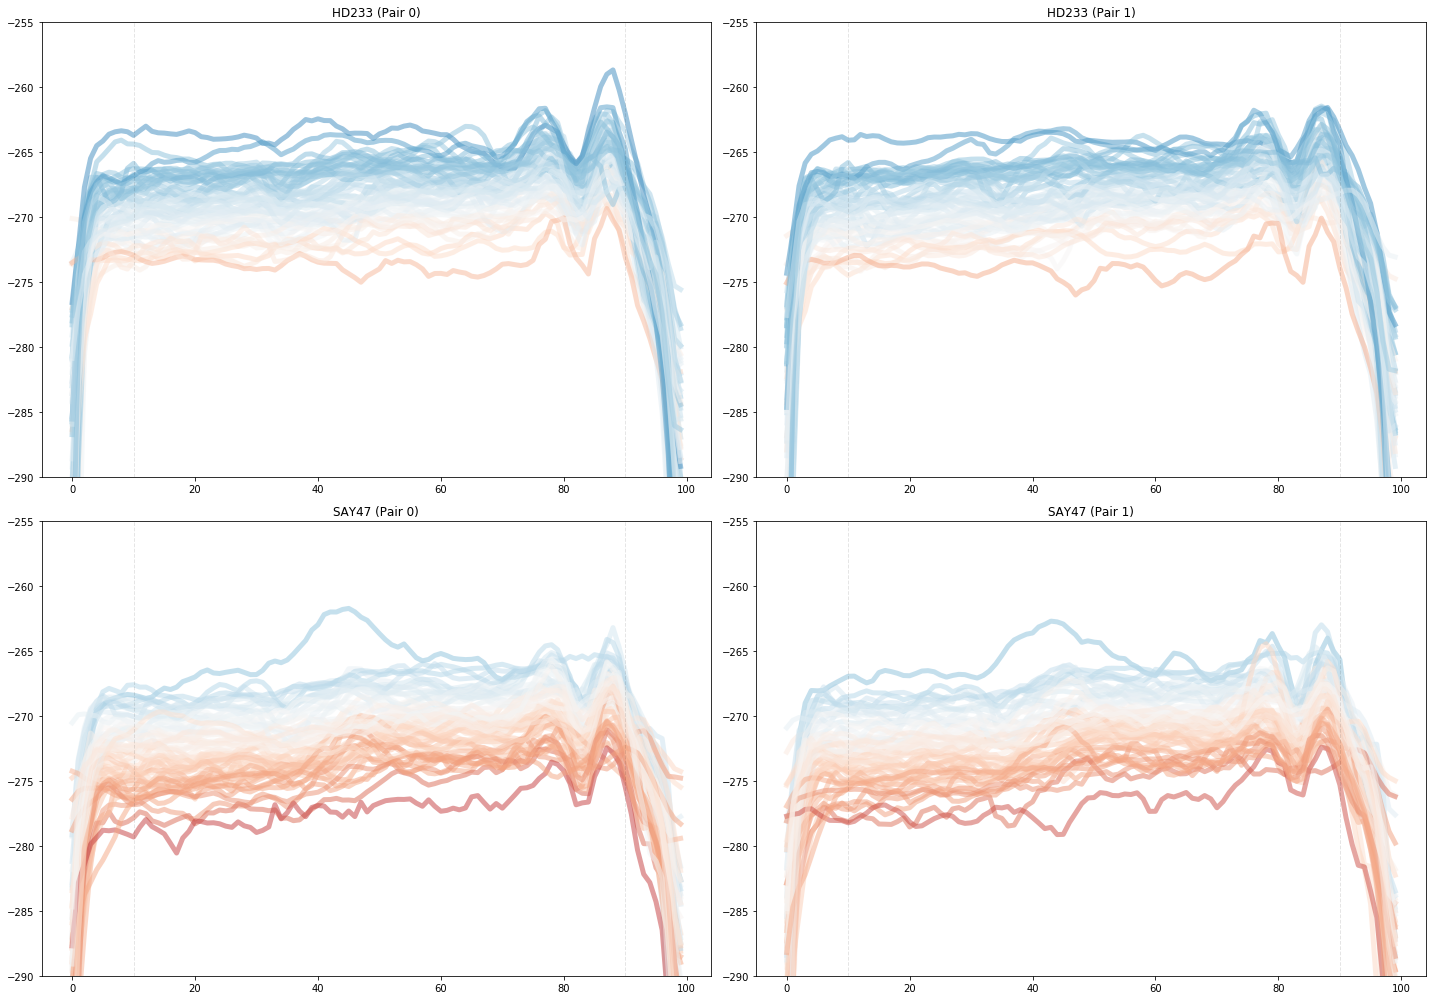

In [4]:
plot_individual_profile_data_by_strain_and_pair(
    pe.e, cmin=-280, cmax=-260, cmap_name='RdBu', 
    ylim=[-290, -255], linewidth=5, alpha=.5,
    cmap_boundary_trim=10, figsize=(20, 14))

# Plot average ratio by strain & pair

In [1]:
fig, axes = plt.subplots(1, 2, figsize=(20,6))
ylim = [-274, -264]

for i in range(2):
    for strain in np.unique(strains):
        data = pe.e.isel(pair=i).sel(strain=strain)
        mean_r = data.mean(dim='strain')
        
        lower, upper = sms.DescrStatsW(data).tconfint_mean()

        xs = np.arange(len(mean_r))

        axes[i].fill_between(xs, lower, upper, alpha=0.3)
        axes[i].plot(mean_r, label=strain, antialiased=True, linewidth=2)
        
    axes[i].set_ylim(ylim)
    axes[i].set_title(f'Pair {i}')
    axes[i].legend()

NameError: name 'plt' is not defined